In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Styling the plots
sns.set_style('whitegrid')

#Loading the csv
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Drop customerID column as it is not useful for analysis
df.drop('customerID', axis=1, inplace=True)

In [2]:
# Displaying the first few rows and info of the dataframe
print(df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [3]:
#To know the info of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


*Observations*

- We can see that totalCharges is an object and not float64
- This is something we have to fix before analyzing the data

***Data Cleaning Process***

In [4]:
#1/ Converting TotalCharges to numeric

#If the values cannot be converted to numeric, coerce will set them to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Checking for null values
print("Check for null values in TotalCharges column:")
#Counts how many NaN values are present in TotalCharges
print(df['TotalCharges'].isnull().sum())

#Filling null values with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

Check for null values in TotalCharges column:
11


/tmp/ipykernel_24804/2304158033.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [5]:
#2/ Check if there is any missing values.

print("\nCheck for any missing values in the dataframe:")
print(df.isnull().sum())


Check for any missing values in the dataframe:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
#3/ Data Cleaning in categorical columns

# Get all the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
# Display unique values in each categorical column
for col in categorical_columns:
    print(f"\nUnique values in column '{col}':")
    print(df[col].value_counts())


Unique values in column 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64

Unique values in column 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Unique values in column 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Unique values in column 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Unique values in column 'MultipleLines':
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Unique values in column 'InternetService':
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Unique values in column 'OnlineSecurity':
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Unique values in column 'OnlineBackup':
OnlineBackup
No                     3088
Yes                    2429
No internet service    

*Observations*

- This is just a check to ensure that we do not have unique values that have the same meaning. This problem exists in a most of the datasets, but in this case all the categorical column values are unique.

In [7]:
#4 Data cleaning in numerical columns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    print(f"\nStatistical summary of column '{col}':")
    print(df[col].describe())


Statistical summary of column 'SeniorCitizen':
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

Statistical summary of column 'tenure':
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Statistical summary of column 'MonthlyCharges':
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Statistical summary of column 'TotalCharges':
count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64
count 

*Observations*

- Here, 'Monthly Charges' and 'tenure' should be non negative values. 
- In this dataset, the values of the above 2 columns are correct, so it is a clean dataset. 
- Decide the range of the numerical columns based on prior info about that aspect and clean it accordingly.

***Exploratory Data Anaysis***

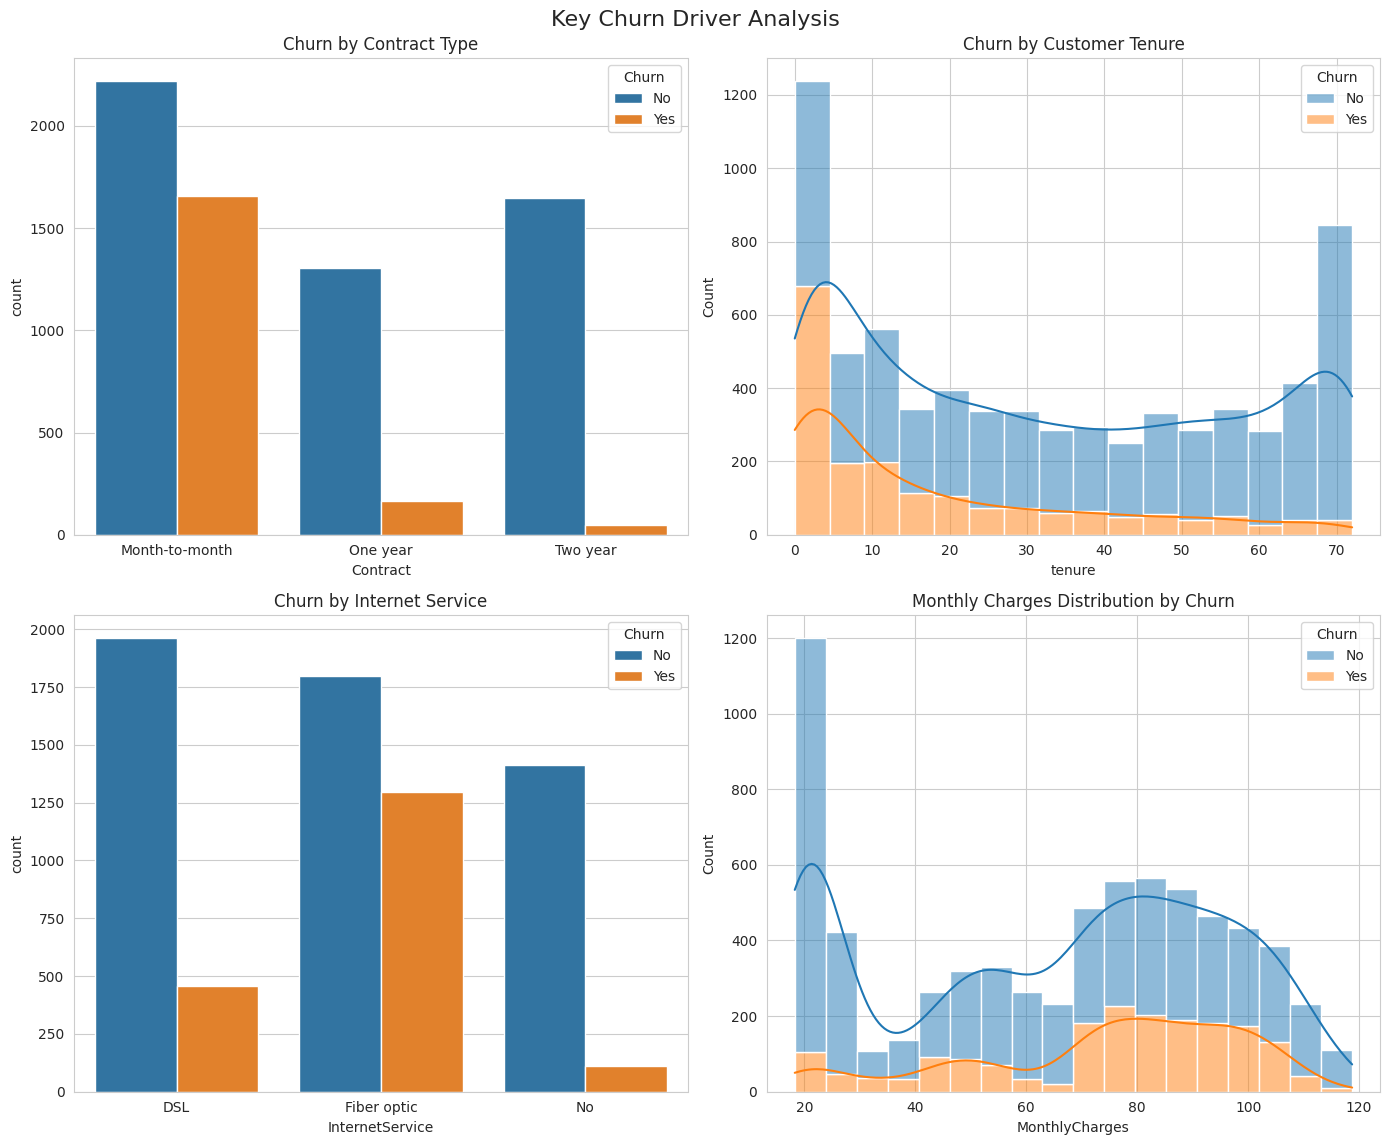

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Key Churn Driver Analysis', fontsize=16)

# Contract vs Churn
sns.countplot(ax=axes[0, 0], x='Contract', data=df, hue='Churn')
axes[0, 0].set_title('Churn by Contract Type')

# Tenure vs Churn
sns.histplot(ax=axes[0, 1], data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
axes[0, 1].set_title('Churn by Customer Tenure')

# Internet Service vs Churn
sns.countplot(ax=axes[1, 0], x='InternetService', data=df, hue='Churn')
axes[1, 0].set_title('Churn by Internet Service')

# Monthly Charges vs Churn
sns.histplot(ax=axes[1, 1], data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
axes[1, 1].set_title('Monthly Charges Distribution by Churn')

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

***Feature Engineering Process***

In [9]:
#1/ Encoding categorical data using one hot encoding

#In our case the target variable is 'Churn'
df_processed = df.copy()
df_processed['Churn'] = df_processed['Churn'].map({'No': 0, 'Yes': 1})

# Identify all other categorical columns
# As churn is already converted to numeric
categorical_cols = df_processed.select_dtypes(include=['object']).columns

# Apply one-hot encoding to these columns
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True, dtype=int)

print("--- Data after one-hot encoding ---")
print(df_processed.head())
print(f"\nNew shape of the dataframe: {df_processed.shape}")
print(f"\nOriginal Shape : {df.shape}")

--- Data after one-hot encoding ---
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0            0   
1              0      34           56.95       1889.50      0            1   
2              0       2           53.85        108.15      1            1   
3              0      45           42.30       1840.75      0            1   
4              0       2           70.70        151.65      1            0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                               1  ...                                0   
1                               

In [10]:
#2/ Scaling the numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Get the numerical columns
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# Fit and transform the numerical columns
# It transforms the data to a standard normal distribution (thereby easy calculations)
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

# Printing the numerical
print(f"\nNumerical columns after scaling")
print(df_processed[numerical_cols].head())



Numerical columns after scaling
     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.994242
1  0.066327       -0.259629     -0.173244
2 -1.236724       -0.362660     -0.959674
3  0.514251       -0.746535     -0.194766
4 -1.236724        0.197365     -0.940470


*Observations*

- We change the range of features such that they are on a comparable scale.
- If we do not do scaling, then during prediction, models that rely on distance or gradient updates will behave poorly.

In [11]:
#3/ Check for duplicates

# Get the number of duplicate rows
# duplicate_rows = df_processed.duplicated().sum()
# print(f"Number of duplicate rows: {duplicate_rows}")

# # If there are duplicate rows, display them
# if duplicate_rows > 0:
#     print("\nDuplicate rows:")
#     print(df_processed[df_processed.duplicated()])
# else:
#     print("No duplicate rows found.")

In [12]:
#4/ Split it into train and test data
from sklearn.model_selection import train_test_split

#Split the input and target variable
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

#Split into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

#Print train and test splits
print(f"Training set's shape : {X_train.shape}")
print(f"Test set's shape : {X_test.shape}")

Training set's shape : (5634, 30)
Test set's shape : (1409, 30)


***Model Building Process***

In [13]:
# 1/ Building a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Create an instance of the Logistic Regression model
print("\n--- Logistic Regression Model Evaluation ---")
lr_model = LogisticRegression(max_iter=1000)
#Fit the model on the training data
lr_model.fit(X_train, y_train)
#Predict on the test data
y_pred_log = lr_model.predict(X_test)
#Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log, target_names=['Not Churn (0)', 'Churn (1)']))



--- Logistic Regression Model Evaluation ---
Accuracy: 0.7877927608232789
Confusion Matrix:
[[911 124]
 [175 199]]

Classification Report:
               precision    recall  f1-score   support

Not Churn (0)       0.84      0.88      0.86      1035
    Churn (1)       0.62      0.53      0.57       374

     accuracy                           0.79      1409
    macro avg       0.73      0.71      0.72      1409
 weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.7877927608232789
Confusion Matrix:
[[911 124]
 [175 199]]

Classification Report:
               precision    recall  f1-score   support

Not Churn (0)       0.84      0.88      0.86      1035
    Churn (1)       0.62      0.53      0.57       374

     accuracy                           0.79      1409
    macro avg       0.73      0.71      0.72      1409
 weighted avg       0.78      0.79      0.78      1409



In [14]:
# 2/ Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create an instance of the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=30)
#Fit the model on the training data
rf_model.fit(X_train, y_train)
#Predict on the test data
y_pred_rf = rf_model.predict(X_test)
#Evaluate the model
print("\n--- Random Forest Model Evaluation ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Not Churn (0)', 'Churn (1)']))



--- Random Forest Model Evaluation ---
Confusion Matrix:
[[927 108]
 [190 184]]
Accuracy: 0.7885024840312278

Classification Report:
               precision    recall  f1-score   support

Not Churn (0)       0.83      0.90      0.86      1035
    Churn (1)       0.63      0.49      0.55       374

     accuracy                           0.79      1409
    macro avg       0.73      0.69      0.71      1409
 weighted avg       0.78      0.79      0.78      1409



*Observations*

- From the two models that we have trained, we choose the logistic regression model to make predictions
- Why??
    - Here the cost of being wrong is not symmetrical. So we do not choose based on accuracy
    - In this case, the cost of missing a customer who is about to leave (Churn = 1) [False Negative] is more significant than giving someone a discount who is going to stay anyway (Churn = 0) [but the model predicted churn, false positive]
    - So, **recall** is a better indicator, because a high recall score indicates, false negatives are really low
    - Based on the 2 models' recall score for churn = 1, in log reg is better than random forest model.

***Training a High Performance Model***

In [15]:
#Training LightGBM model

import lightgbm as lgb
from sklearn.metrics import classification_report

# Initialize and train the LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Evaluate performance
y_pred_lgbm = lgbm.predict(X_test)
print("--- LightGBM Performance ---")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
--- LightGBM Performance ---
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [16]:
#Financial Impact Analysis

def calculate_savings(y_true, y_pred, cost_intervention, cost_churn):
    """Calculates the financial impact of a churn model."""
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    cost_of_doing_nothing = (fn + tp) * cost_churn
    cost_of_model = (tp + fp) * cost_intervention + fn * cost_churn
    savings = cost_of_doing_nothing - cost_of_model
    
    print(f"True Positives (Retained Customers): {tp}")
    print(f"False Positives (Unnecessary Offers): {fp}")
    print(f"False Negatives (Missed Churners): {fn}")
    print(f"-------------------------------------------")
    print(f"Cost if we do nothing: ${cost_of_doing_nothing:,.2f}")
    print(f"Cost with model intervention: ${cost_of_model:,.2f}")
    print(f"Potential Savings with Model: ${savings:,.2f}")

# Assumptions
avg_customer_lifetime_value = 1500  # Cost of a customer churning
retention_offer_cost = 100         # Cost to intervene

calculate_savings(y_test, y_pred_lgbm, retention_offer_cost, avg_customer_lifetime_value)

True Positives (Retained Customers): 193
False Positives (Unnecessary Offers): 123
False Negatives (Missed Churners): 181
-------------------------------------------
Cost if we do nothing: $561,000.00
Cost with model intervention: $303,100.00
Potential Savings with Model: $257,900.00



--- Customer Segment Analysis ---
            tenure  MonthlyCharges  Churn_Numeric
Cluster                                          
2        14.811252       81.215903       0.491833
0        10.487875       32.470699       0.245381
1        58.748975       93.019621       0.156250
3        54.115152       34.028745       0.047619


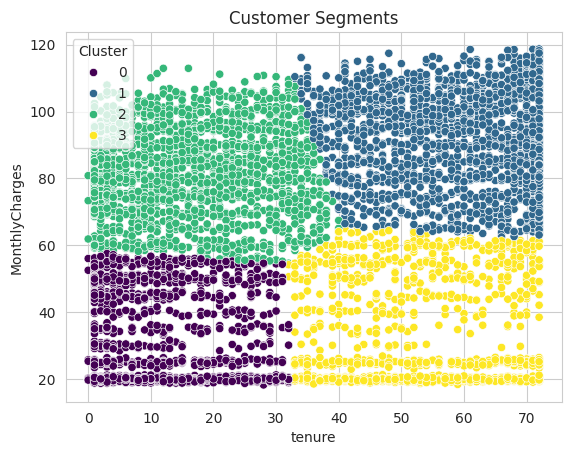

In [ ]:
#Customer Segmentation

from sklearn.cluster import KMeans

# Select features for clustering
cluster_features = ['tenure', 'MonthlyCharges']
df_cluster = df[cluster_features]

# Scale features
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Convert 'Churn' column to numeric for aggregation
df['Churn_Numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Analyze the clusters
cluster_analysis = df.groupby('Cluster')[['tenure', 'MonthlyCharges', 'Churn_Numeric']].mean().sort_values(by='Churn_Numeric', ascending=False)
print("\n--- Customer Segment Analysis ---")
print(cluster_analysis)

# Plot the clusters
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

/home/vishal/customer-churn-analysis/.venv/lib/python3.12/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


Explaining prediction for customer at index position: 634
This customer has a churn probability of: 0.96


<Figure size 3000x600 with 0 Axes>

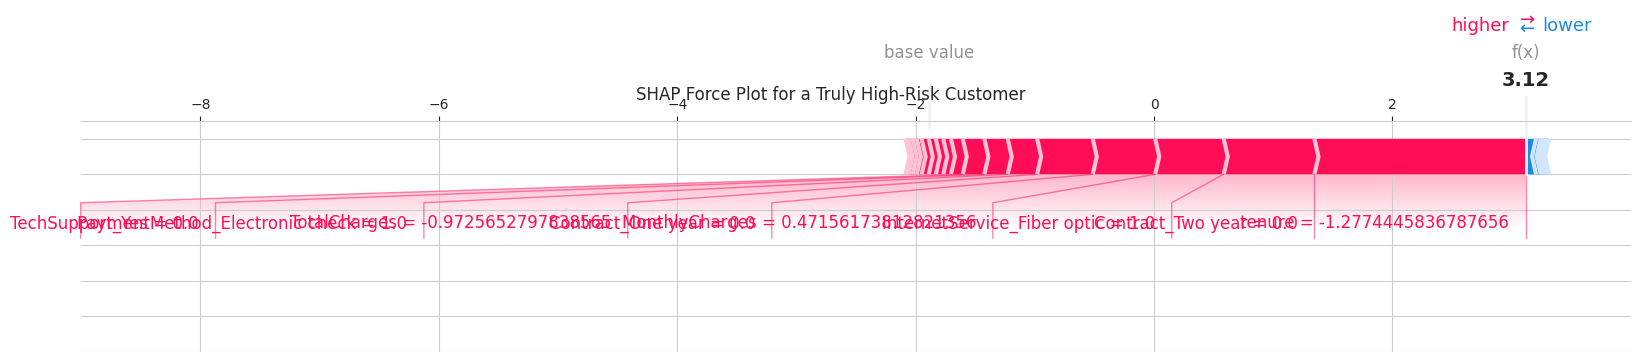

In [30]:
# --- Individual Prediction Explanation (Corrected for Binary Classification) ---
import shap

# Create the SHAP explainer
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)

# 1. Get the churn probabilities for the "Churn" class (class 1)
churn_probabilities = lgbm.predict_proba(X_test)[:, 1]

# 2. Find the index of the customer with the highest churn probability
high_risk_pos = np.argmax(churn_probabilities)

# 3. Explain the prediction
print(f"Explaining prediction for customer at index position: {high_risk_pos}")
print(f"This customer has a churn probability of: {churn_probabilities[high_risk_pos]:.2f}")

plt.figure(figsize=(30, 6))

# For binary classification, shap_values is ndarray, expected_value is scalar
shap.force_plot(
    explainer.expected_value,
    shap_values[high_risk_pos,:],
    X_test.iloc[high_risk_pos,:],
    matplotlib=True,
    show=False
)
plt.suptitle("SHAP Force Plot for a Truly High-Risk Customer", y=1.0)
plt.show()

***Insights***

In [ ]:
# --- IMPORTANT: We need the original data before it was scaled and one-hot encoded ---
# We'll use the original dataframe 'df' and select the customers who are in our test set.
# The 'X_test.index' holds the location of the test customers in the original dataframe.
df_original_test = df.loc[X_test.index]

# Create a new results dataframe with the original, readable data
df_dashboard = df_original_test.copy()

# Add the predictions and probabilities from our model
df_dashboard['Predicted_Churn'] = y_pred_log
df_dashboard['Churn_Probability'] = lr_model.predict_proba(X_test)[:, 1]

# Export this new, business-friendly dataframe to a CSV
df_dashboard.to_csv('churn_dashboard.csv', index=False)